In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 가져오기

In [118]:
bike = pd.read_csv('data/bike-sharing-demand/train.csv')
print(bike.shape)
print(bike.head())

(10886, 12)
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [119]:
bike_test = pd.read_csv('data/bike-sharing-demand/test.csv')

### datatime 컬럼 datetime 자료형으로 변환하고 연,월,일,시,분,초 6가지 컬럼으로 생성하기

In [120]:
# datetime 자료형으로 변환
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [121]:
bike_test['datetime'] = pd.to_datetime(bike_test['datetime'])
bike_test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [122]:
# 연,월,일,시,분,초 6가지 컬럼으로 생성하기
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second
print(bike.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

In [123]:
bike_test['year'] = bike_test['datetime'].dt.year
bike_test['month'] = bike_test['datetime'].dt.month
bike_test['day'] = bike_test['datetime'].dt.day
bike_test['hour'] = bike_test['datetime'].dt.hour
bike_test['minute'] = bike_test['datetime'].dt.minute
bike_test['second'] = bike_test['datetime'].dt.second
print(bike_test.head())

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  minute  second  
0        56    26.0027  2011      1   20     0       0       0  
1        56     0.0000  2011      1   20     1       0       0  
2        56     0.0000  2011      1   20     2       0       0  
3        56    11.0014  2011      1   20     3       0       0  
4        56    11.0014  2011      1   20     4       0       0  


### year, month, day, hour, minute, second 데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

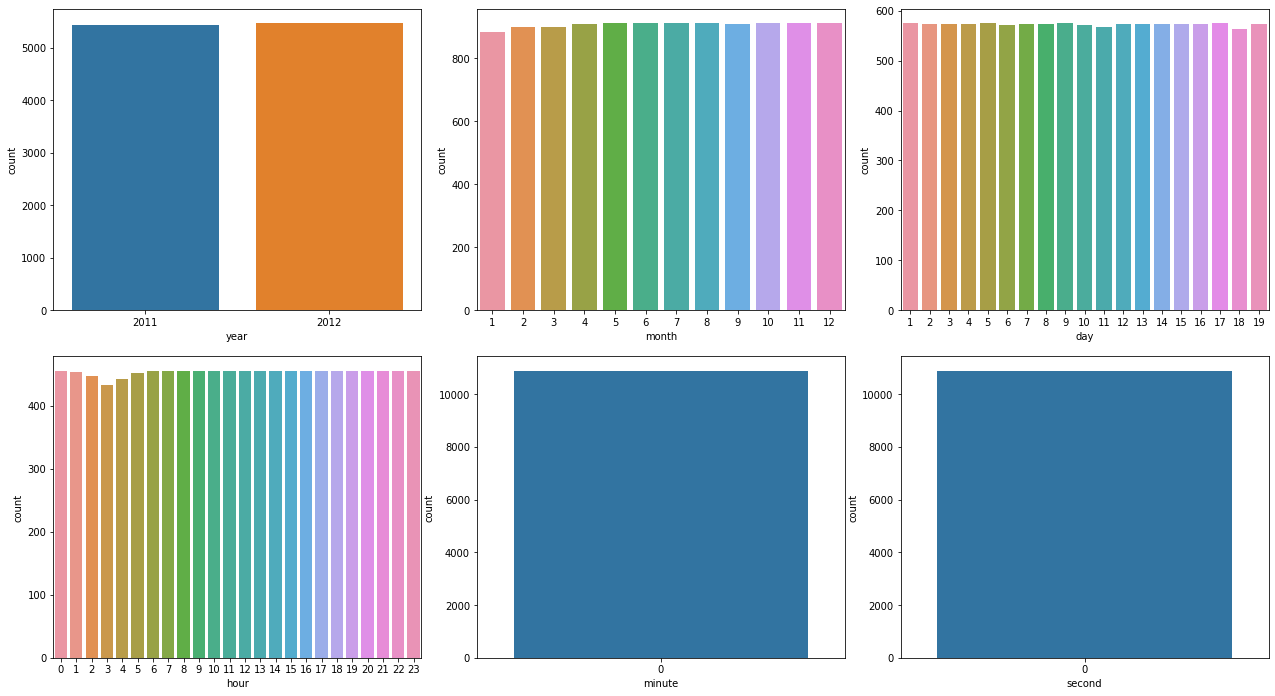

In [21]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(18,10)
fig.tight_layout(pad=2.5)
sns.countplot(data = bike, x = bike['year'], ax= axes[0,0])
sns.countplot(data = bike, x = bike['month'], ax= axes[0,1])
sns.countplot(data = bike, x = bike['day'], ax= axes[0,2])
sns.countplot(data = bike, x = bike['hour'], ax= axes[1,0])
sns.countplot(data = bike, x = bike['minute'], ax= axes[1,1])
sns.countplot(data = bike, x = bike['second'], ax= axes[1,2])

위의 그래프는 연,월,일,시,분,초의 각 시기,시간대 별 총 데이터를 알 수 있다.
* 분과 초 데이터에 따르면 분과 초는 항상 0의 값을 가진다는 것을 알 수 있다. 
* 일의 데이터를 보면 1일부터 19일까지만 존재한다는 것도 알 수 있다.

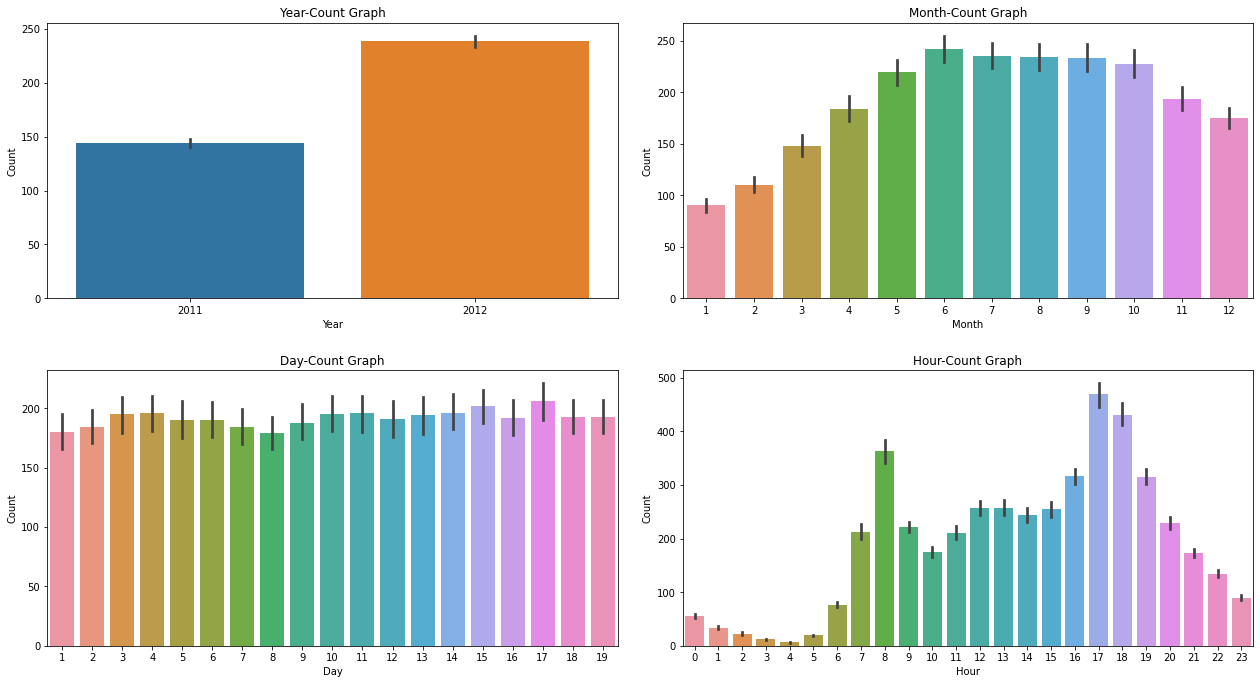

In [24]:
fig, ((ax1,ax2),(ax3,ax4,)) = plt.subplots(2,2)
fig.set_size_inches(18,10)
sns.barplot(data = bike, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = bike, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = bike, x = 'day', y = 'count', ax = ax3)
sns.barplot(data = bike, x = 'hour', y = 'count', ax = ax4)

ax1.set(xlabel = 'Year', ylabel = "Count", title = "Year-Count Graph" )
ax2.set(xlabel = 'Month', ylabel = "Count", title = "Month-Count Graph" )
ax3.set(xlabel = 'Day', ylabel = "Count", title = "Day-Count Graph" )
ax4.set(xlabel = 'Hour', ylabel = "Count", title = "Hour-Count Graph" )

fig.tight_layout(pad = 2.5)

* 연도별 대여량 그래프를 보면 연도가 증가함에따라 대여량도 증가한 것을 볼 수 있다.
<br>
* 월별 대여량 그래프에 따르면 1월부터 6월까지는 대여량이 증가하다가 7-9월까지는 6월보다는 대여량이 살짝 감소하나 비슷한 대여량으로 이어가다 10월부터 대여량이 감소하는 것을 알 수 있다. 이를 보면 계절이나 온도와 관계가 있을 것으로 예상된다.
<br>
* 일별 그래프로는 큰 상관관계를 유추해낼 수 있을 것 같지 않다.
<br>
* 시간별 대여량 그래프에 따르면 아침 7시에 갑자기 증가하다가 다시 오후 5시쯤 갑자기 증가하는 것을 보면 사람들의 통근시간과 관련이 있을 것으로도 보인다. 또한 이 시간별 그래프는 휴일과 평일을 나눠서 분석해봐도 좋을 것 같다.



### 계절에 따른 대여량, 날씨에 따른 대여량, 휴일에 따른 대여량, 평일에 따른 대여량 살펴보기

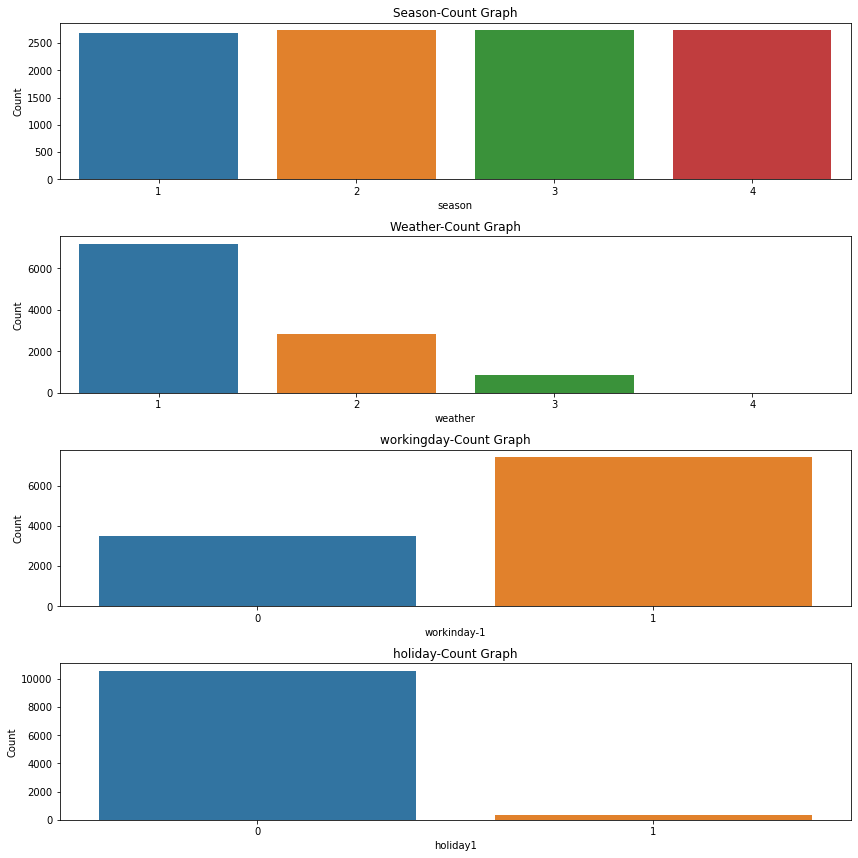

In [25]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.set_size_inches(12,12)
sns.countplot(data = bike, x = bike['season'], ax= ax1)
sns.countplot(data = bike, x = bike['weather'], ax= ax2)
sns.countplot(data = bike, x = bike['workingday'], ax= ax3)
sns.countplot(data = bike, x = bike['holiday'], ax= ax4)
# sns.barplot(data = bike, x = "season", y = "count",  ax = ax1)
# sns.barplot(data = bike, x = "weather", y = "count", ax = ax2)
# sns.barplot(data = bike, x = 'workingday', y = 'count', ax = ax3)
# sns.barplot(data = bike, x = "holiday", y = 'count', ax = ax4)

ax1.set(xlabel = 'season', ylabel = "Count", title = "Season-Count Graph" )
ax2.set(xlabel = 'weather', ylabel = "Count", title = "Weather-Count Graph" )
ax3.set(xlabel = 'workinday-1', ylabel = "Count", title = "workingday-Count Graph" )
ax4.set(xlabel = 'holiday1', ylabel = "Count", title = "holiday-Count Graph" )
fig.tight_layout(pad = 1.0)

In [80]:
bike.loc[bike.weather == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


* 계절별 대여량 그래프에 따르면 가을철에 가장 큰 대여량을 보여주고 여름도 대체로 높은 대여량을 보여준다 봄철의 대여량이 가장 적다는 것을 알 수 있다.
<br>
<br>
* 날씨에 따른 대여량을 보면 맑은 날 가장 대여량이 크고 그 다음으로 흐린 날이 그 다음으로 대여량이 많은 것을 볼 수 있다.
* 날씨가 4일때의 데이터는 단 1개 존재하므로 3과 합쳐도 될 것이라고 생각한다.
<br>
<br>
* 평일 대여량이 휴일 대여량보다 더 높다.
* 하지만 workingday의 0 값과 holiday의 1의 값이 다른 것으로 보아 일하지 않는 날과 휴일이 다른 데이터로 존재하는 듯하다.
* 이 부분에 대해 어떻게 처리해야할까? 먼저 시간에 따른 workingday 그래프와 holiday그래프를 확인한 후 생각해보자

In [124]:
# 날씨 4를 3으로 바꿔주기
bike.loc[bike["weather"] == 4, "weather"] = 3
bike_test.loc[bike_test["weather"] == 4, "weather"] = 3

### 시간에 따른 workingday, holiday 그래프

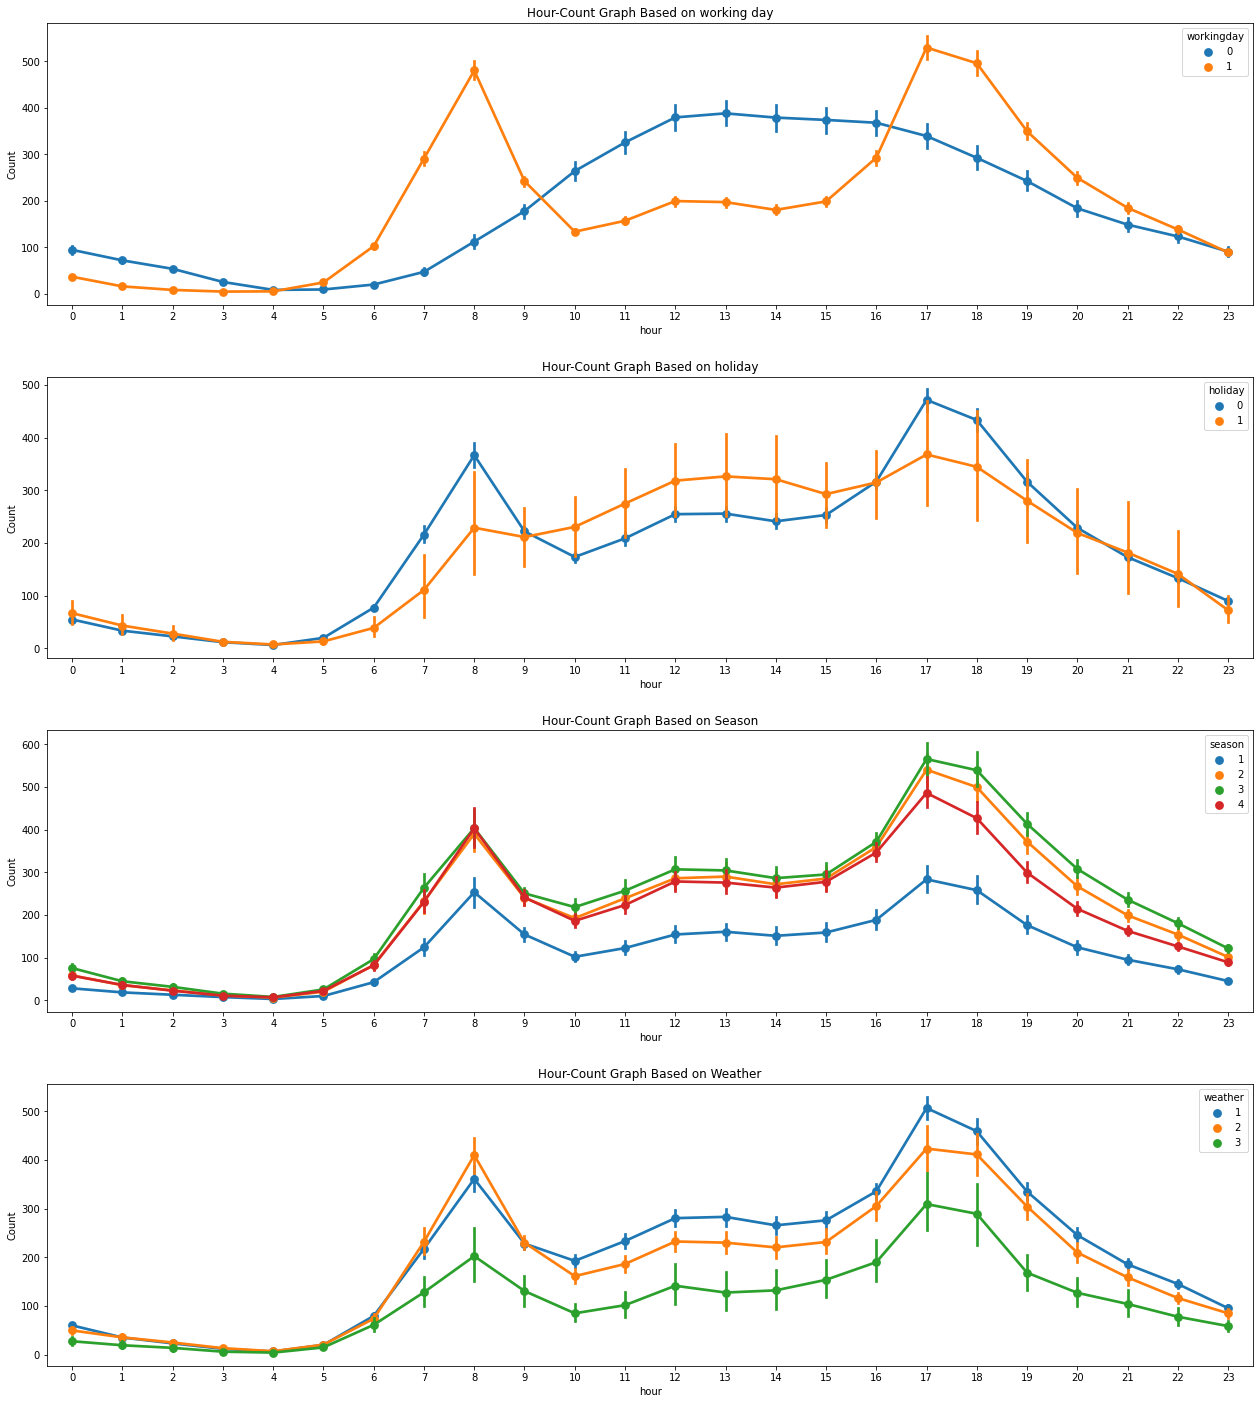

In [28]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.set_size_inches(18, 20)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "workingday", ax = ax1)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "holiday", ax = ax2)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "season", ax = ax3)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "weather", ax = ax4)

ax1.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on working day" )
ax2.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on holiday" )
ax3.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on Season" )
ax4.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on Weather" )
fig.tight_layout(pad = 2.5)

맨 위 두 그래프는 휴일과 평일을 바탕으로 한 시간별 대여량인데 위에 그래프는 평일이 1의 값, 아래의 그래프는 휴일이 1의 값을 가지는 그래프이다.
사실상 두 그래프는 비슷한 것을 보여준다.
* 평일 시간대의 대여량 그래프는 아침 7-8시 사이에 급증하고 다시 오후 4-5시 사이에 급증한다
* 휴일 시간대의 대여량 그래프는 오후로 갈수록 완만하게 증가하다 저녁시간이 되면 대여량이 줄어든다
* 이 두 특징을 보아 평일 시간대는 통근시간대에 대여량이 느는 것으로 보여지고 휴일 시간대는 낮시간에 대여량이 증가한다는 것을 알 수 있다.

* workingday데이터의 0의값들과 holiday 데이터의 1의 값들이 비슷한 양상을 보여주고 있는것으로 보아 workingday의 1번값들과 holiday의 0의 값인 데이터들을 workingday로 간주하고 workingday의 0값과 holiday의 1값을 가진 데이터들을 not_workingday라는 열을 만들기로 함.

* 위의 계절별 대여량 그래프에서 봄의 대여량이 가장 적었던 것처럼 3번째에 있는 계절별 시간에 따른 대여량에서도 봄의 대여량이 가장 적고 여름과 가을이 높은 대여량을 보여준다.

* 날씨별 시간에 따른 대여량에서는 4의 값을 가진 데이터를 3으로 바꿔준 이후의 데이터에서도 날씨가 가장 좋은 1이 가장 높은 대여량을 날씨가 가장 좋지않은 3에서 가장 낮은 대여량을 보여준다.

In [125]:
# make workingday and not_workingday data in train and test data because the holiday and not working day was so ambiguous.
bike.loc[(bike.workingday ==1) & (bike.holiday == 0), "workingday"] = 1
bike["not_workingday"] = np.zeros(bike.shape[0])
bike.loc[(bike.workingday == 0) & (bike.holiday == 1), "not_workingday"] = 1
print(bike.not_workingday.value_counts())
print(bike.not_workingday.value_counts().sum() == bike.shape[0])

0.0    10575
1.0      311
Name: not_workingday, dtype: int64
True


In [126]:
bike_test.loc[(bike_test.workingday ==1) & (bike_test.holiday == 0), "workingday"] = 1
bike_test["not_workingday"] = np.zeros(bike_test.shape[0])
bike_test.loc[(bike_test.workingday == 0 )& (bike_test.holiday == 1), "not_workingday"] = 1
print(bike_test.not_workingday.value_counts())
print(bike_test.not_workingday.value_counts().sum() == bike_test.shape[0])

0.0    6304
1.0     189
Name: not_workingday, dtype: int64
True


### 박스플롯으로 계절, 날씨, 휴일, 평일별 대여량 이상치 해석하기

[Text(0.5, 0, 'Holiday -1'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count based on Holiday')]

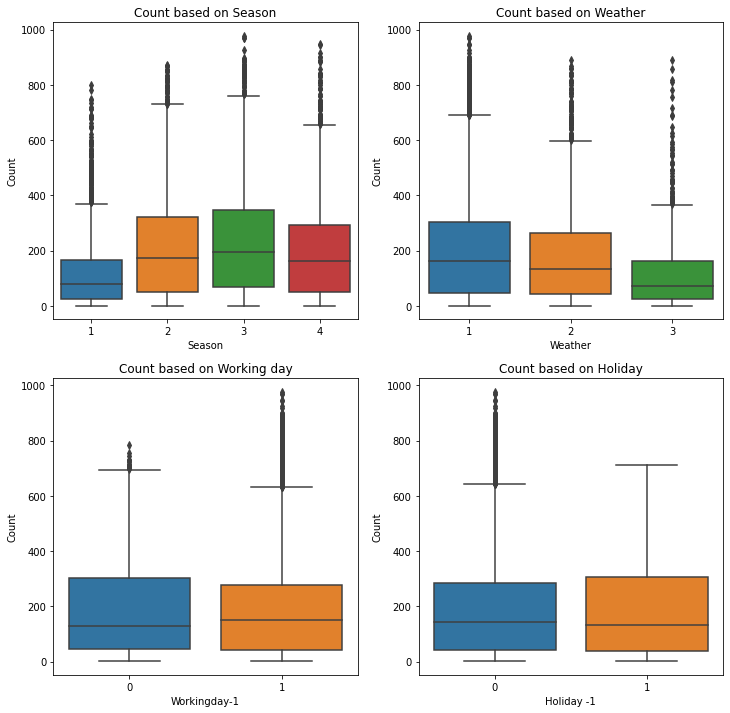

In [31]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12,12)
sns.boxplot(data = bike, x = 'season', y = 'count', orient = 'v', ax = axes[0][0])
sns.boxplot(data = bike, x = 'weather',y = 'count', orient = 'v', ax = axes[0][1])
sns.boxplot(data = bike, x = 'workingday',y = 'count', orient = 'v', ax = axes[1][0])
sns.boxplot(data = bike, x = 'holiday',y = 'count', orient = 'v', ax = axes[1][1])

axes[0][0].set(xlabel = 'Season', ylabel = "Count", title = "Count based on Season")
axes[0][1].set(xlabel = 'Weather', ylabel = 'Count', title = 'Count based on Weather')
axes[1][0].set(xlabel = 'Workingday-1', ylabel = 'Count', title = "Count based on Working day")
axes[1][1].set(xlabel = 'Holiday -1', ylabel = 'Count', title = "Count based on Holiday")

해석써야하는데 솔직히 박스플랏 데이터 해석 어케할지 모르겠음 일단 지금은 건너뛰기

### 기온, 습도, 풍속, 등록된 사람, 등록되지 않은 사람과 대여량의 연관성 확인

In [34]:
bike_corr = bike[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corr = bike_corr.corr()
corr

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<AxesSubplot:title={'center':'Heatmap of temp, humidity, windspeed, casual, registered, and counter'}>

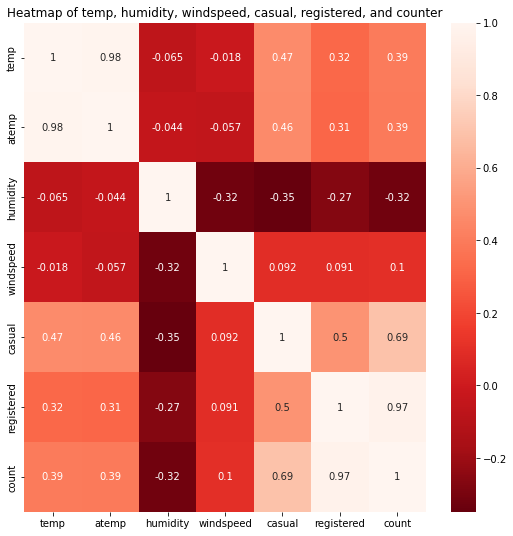

In [35]:
plt.figure(figsize=(9,9))
plt.title("Heatmap of temp, humidity, windspeed, casual, registered, and counter")
sns.heatmap(corr, annot = True, cmap = 'Reds_r')

히트맵을 통해 대여량과 온도, 습도, 풍속, 등록하지 않은 사람, 등록한 사람과의 연관성을 볼 수 있다.
* 온도, 습도, 풍속과 대여량에는 큰 연관성이 없어보인다.
* 자전거를 정기적으로 대여하는 사람들과 대여량의 연관성이 가장 큰 것으로 보인다.

<br>
하지만 test데이터에는 casual과 register이 없기 때문에 train데이터에서 casaul과 register feature은 빼기로하자.

### 온도, 습도, 풍속과 대여량의 관계를 산점도를 통해 확인해 보자

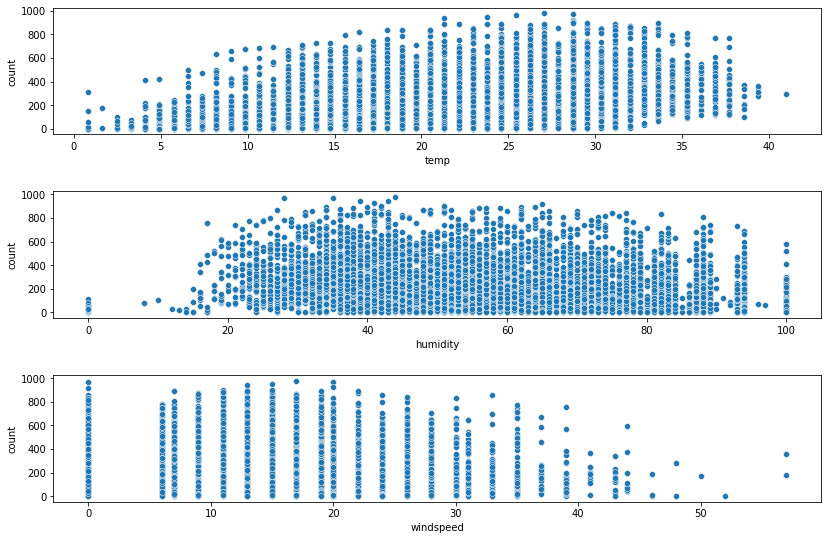

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(12, 8)
sns.scatterplot(data = bike, x = 'temp', y = 'count', ax = ax1)
sns.scatterplot(data = bike, x = 'humidity', y = 'count', ax = ax2)
sns.scatterplot(data = bike, x = 'windspeed', y = 'count', ax = ax3)

fig.tight_layout(pad = 2.5)

* 온도가 낮거나 매우 높으면 대여량이 높지 않고 중간정도의 온도때 가장 많은 대여량이 나타난다.
* 습도와 대여량에는 큰 연관성은 없어보인다.
* 풍속이 높을수록 대여량은 떨어진다.
* 풍속 데이터에 0의 값이 너무 많은 것을 볼 수 있다. 이는 결측치로 보인다. 이 부분에 대해서는 feature engineering에서 0의 값들을 다른 값으로 변환시켜야한다고 생각한다.

### 박스플롯으로 온도, 습도, 풍속, 등록된 사람, 등록되지 않은 사람, 대여량 이상치 해석하기

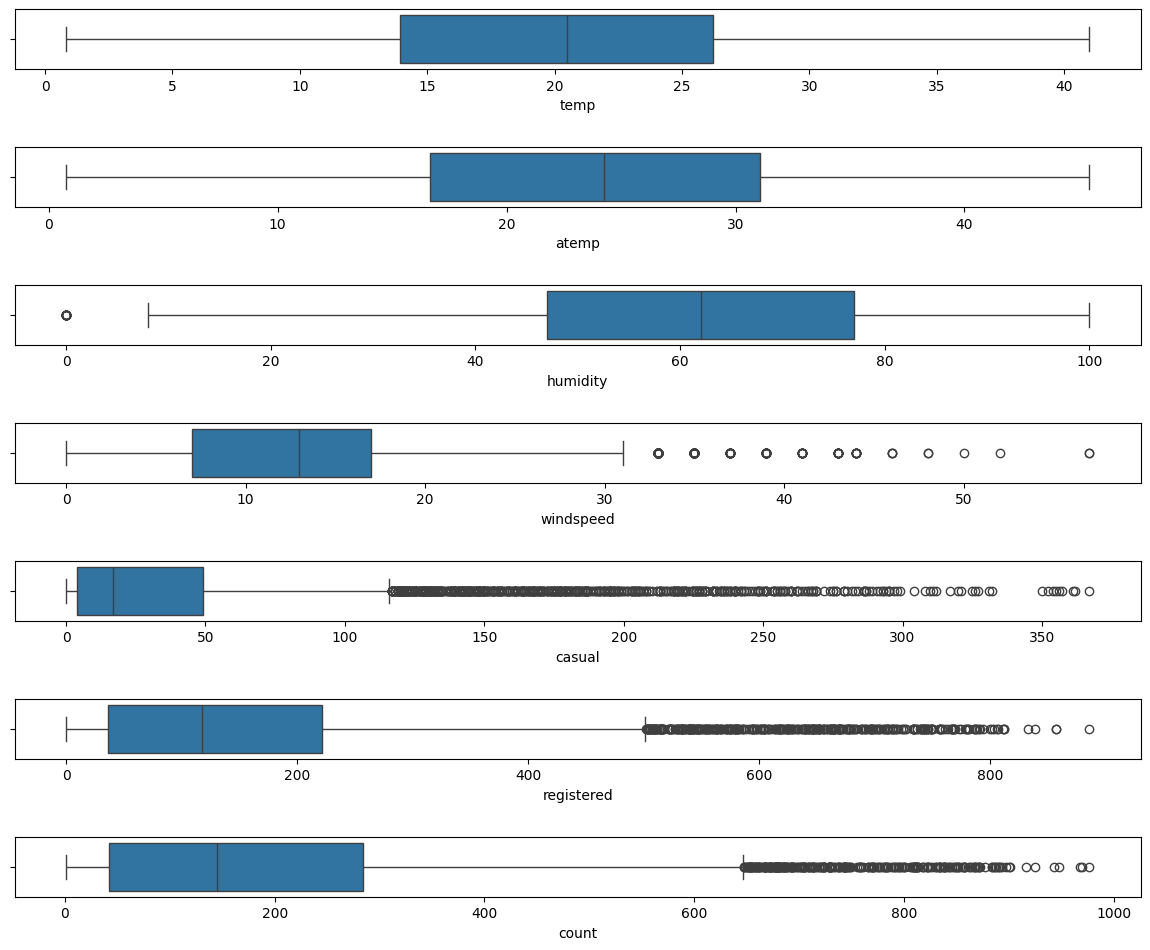

In [48]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 7, figsize = (12,10))
sns.boxplot(data = bike, x = 'temp', ax = ax1)
sns.boxplot(data = bike, x = 'atemp', ax = ax2)
sns.boxplot(data = bike, x = 'humidity', ax = ax3)
sns.boxplot(data = bike, x = 'windspeed', ax = ax4)
sns.boxplot(data = bike, x = 'casual', ax = ax5)
sns.boxplot(data = bike, x = 'registered', ax = ax6)
sns.boxplot(data = bike, x = 'count', ax = ax7)
fig.tight_layout(pad = 2.5)

이상치가 너무 많은 경우는 이상치 제거를 하지 않는 것이 좋을 것 같다.

## Feature Engineering 
### 풍속 0값을 대체값으로 전환하기
하려고했으나 풍속으로 인한 대여량 관계가 그렇게 크지 않은것으로 보아 그냥 넘가도록 하자.

In [12]:
#결측값을 머신러닝을 사용하여 예측된 값으로 대체하는 방법을 써보자
from sklearn.ensemble import RandomForestClassifier
def predict_wind(data):
  # 풍속 값이 0인 데이터와 0이 아닌 데이터로 나눠준다.
    wind_0 = data.loc[data['windspeed']==0] # test
    wind_0x = data.loc[data['windspeed'] != 0] # train

  #풍속이 날씨변수이기 때문에 날씨변수들을 활용하여 풍속을 예측해보기
    cols = ['season', 'weather', 'temp', 'humidity', 'atemp']
    wind_0x['windspeed'] = wind_0x['windspeed'].astype('str')
    
    rf = RandomForestClassifier() # 누락된 값을 추산할때 효과적이기 때문에 사용
    rf.fit(wind_0x[cols], wind_0x['windspeed'])
    
    # 풍속이 0인 부분 예측
    predict_0 = rf.predict(X = wind_0[cols])
    
    # 풍속이 0인 풍속 값을 predict_0으로 바꿔주기
    wind_0['windspeed'] = predict_0
    
    data = wind_0x.append(wind_0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data
  
  

In [13]:
bike = predict_wind(bike)
bike_test = predict_wind(bike_test)

/tmp/ipykernel_50/1277271577.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_0x['windspeed'] = wind_0x['windspeed'].astype('str')
/tmp/ipykernel_50/1277271577.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_0['windspeed'] = predict_0
/tmp/ipykernel_50/1277271577.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

<AxesSubplot:xlabel='windspeed', ylabel='count'>

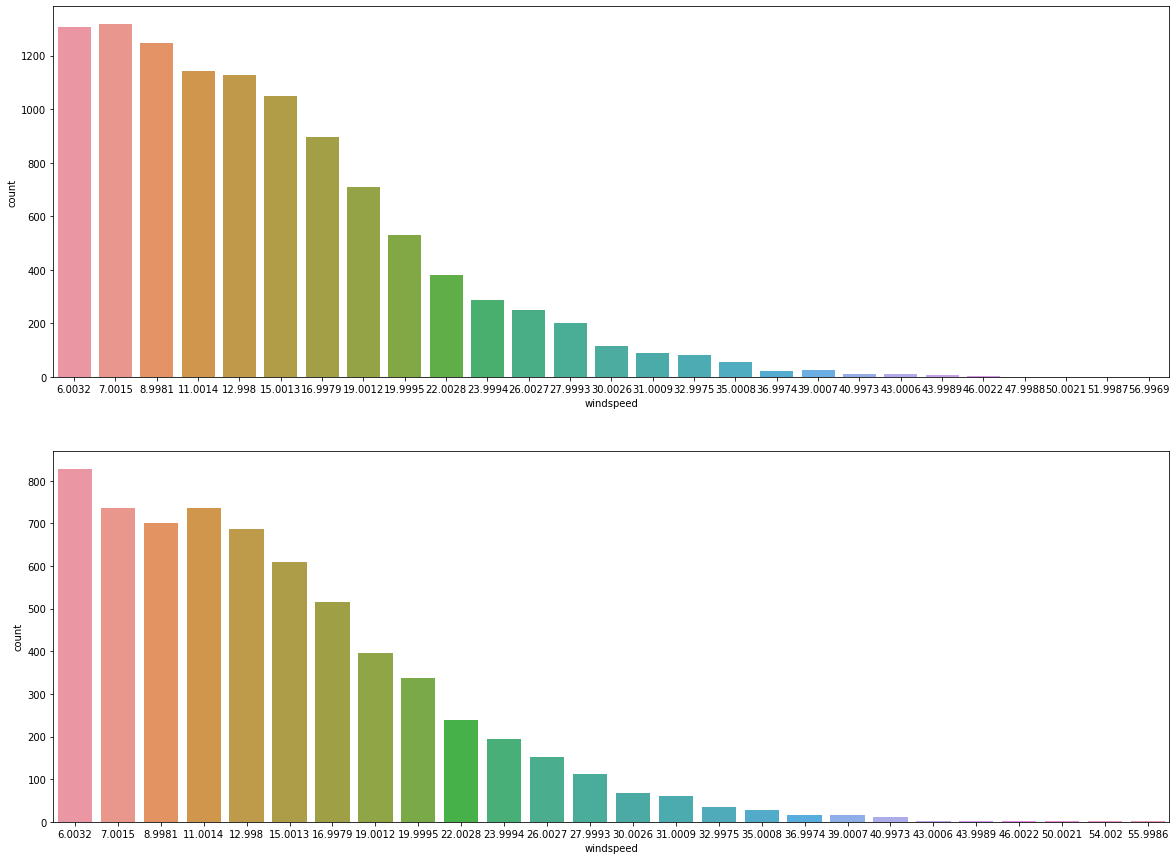

In [86]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)

sns.countplot(data = bike, x = 'windspeed', ax = ax1)
sns.countplot(data = bike_test, x = 'windspeed', ax = ax2)

더 이상 풍속에 0의 값이 없는 것을 확인할 수 있다.

### 왜도와 첨도를 통해 데이터 확인 후 전처리

위의 박스플롯들을 보면 박스들이 한쪽으로 치우쳐져있고 아웃라이어가 많다는 것을 알 수 있다. 이를 통해 왜도의 절댓값이 높을 것으로 확인되고 첨도 또한 높을 것으로 예상된다.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness(왜도): 1.242066
kurtosis(첨도): 1.300093


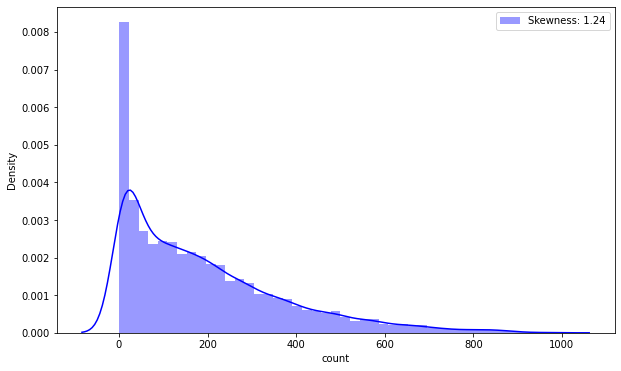

In [57]:
fig, (ax1,) = plt.subplots(1,1, figsize = (10, 6))

graph = sns.distplot(bike['count'], color = 'b', label = 'Skewness: {:.2f}'.format(bike['count'].skew()), ax = ax)         
graph = graph.legend(loc = 'best')
print('skewness(왜도): %f' %bike['count'].skew())
print('kurtosis(첨도): %f' %bike['count'].kurt())

왜도(skew)의 수치가 -2~2정도가 되면 치우침이 없는 데이터라고 할 수 있다.
그래프상으로는 한쪽으로 치우쳐져있지만 실제 왜도는 -2와 2의 사이에 위치해 있어 치우쳐있지 않다고한다. 또한 첨도도 높지 않다. 그렇지만 정규화를 해주는 것이 좋을 것 같다.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : -0.971228
Kurtosis : 0.246622


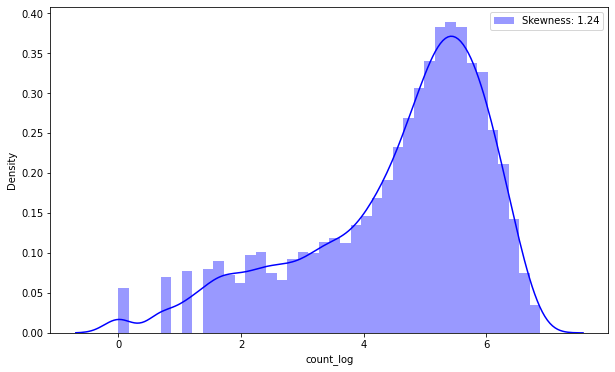

In [131]:
bike['count_log'] = np.zeros(bike.shape[0])
bike['count_log'] = bike['count'].map(lambda i: np.log(i) if i > 0 else 0)
fig, ax = plt.subplots(1,1,figsize = (10,6))
graph = sns.distplot(bike['count_log'], color = 'b', label = 'Skewness: {:.2f}'.format(bike['count'].skew()), ax = ax)
graph = graph.legend(loc = "best")
print("Skewness : %f" % bike['count_log'].skew())
print("Kurtosis : %f" % bike['count_log'].kurt())

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


temp skewness(왜도): 0.003691
temp kurtosis(첨도): -0.914530
atemp skewness(왜도): -0.102560
atemp kurtosis(첨도): -0.850076
humidity skewness(왜도): -0.086335
humidity kurtosis(첨도): -0.759818


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


windspeed skewness(왜도): 1.111337
windspeed kurtosis(첨도): 1.450110


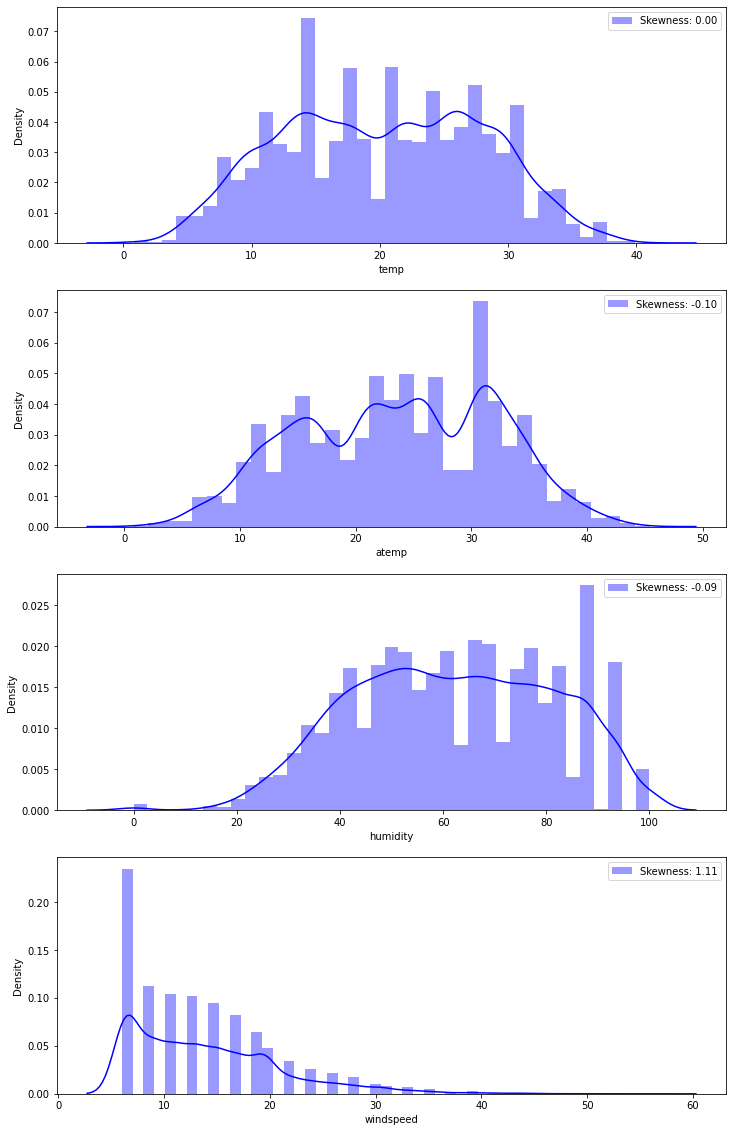

In [65]:
fig, (ax5,ax6,ax7,ax8) = plt.subplots(4,1, figsize = (12, 20))
graph5 = sns.distplot(bike['temp'], color = 'b', label = 'Skewness: {:.2f}'.format(bike['temp'].skew()), ax = ax5)         
graph5 = graph5.legend(loc = 'best')
print('temp skewness(왜도): %f' %bike['temp'].skew())
print('temp kurtosis(첨도): %f' %bike['temp'].kurt())
graph6 = sns.distplot(bike['atemp'], color = 'b', label = 'Skewness: {:.2f}'.format(bike['atemp'].skew()), ax = ax6)         
graph6 = graph6.legend(loc = 'best')
print('atemp skewness(왜도): %f' %bike['atemp'].skew())
print('atemp kurtosis(첨도): %f' %bike['atemp'].kurt())
graph7 = sns.distplot(bike['humidity'], color = 'b', label = 'Skewness: {:.2f}'.format(bike['humidity'].skew()), ax = ax7)         
graph7 = graph7.legend(loc = 'best')
print('humidity skewness(왜도): %f' %bike['humidity'].skew())
print('humidity kurtosis(첨도): %f' %bike['humidity'].kurt())
graph8 = sns.distplot(bike['windspeed'], color = 'b', label = 'Skewness: {:.2f}'.format(bike['windspeed'].skew()), ax = ax8)         
graph8 = graph8.legend(loc = 'best')
print('windspeed skewness(왜도): %f' %bike['windspeed'].skew())
print('windspeed kurtosis(첨도): %f' %bike['windspeed'].kurt())

# 모델에 입력할 데이터 X 준비하기

### feature로 사용할 데이터 고르기
* month
* hour
* workingday : 나눠진 범주형
* not_workingday (holiday 1값 & workingday0 값들) : 나눠진 범주형
* weather (1,2,3) : 범주형
* season (1,2,3,4) : 범주형
* temp
* humidity
* windspeed

### 뺀 feature 그 이유는?
* datetime: 모든 연월일시간데이터가 있기때
* year: 매년 증가하긴하나 이 문제의 답을 낼때는 관계가 크게 없어보임
* day: 1-19일까지밖에 없기도하고 일에 따른 대여량의 관계가 뚜렷하게 나타나지 않는다.
* minute, second = 모두 다 값이 0
* holiday - 이것은 not_workingday로 바꿈
* atemp - temp와 비슷한 데이터이기 때문
* casual, registered - test 데이터에 없음


In [127]:
# change categorical feature(season, weather) to one hot encoding
bike["S1"] = np.zeros(bike.shape[0])
bike["S2"] = np.zeros(bike.shape[0])
bike["S3"] = np.zeros(bike.shape[0])
bike["S4"] = np.zeros(bike.shape[0])
bike.loc[bike.season == 1, "S1"] = 1
bike.loc[bike.season == 2, "S2"] = 1
bike.loc[bike.season == 3, "S3"] = 1
bike.loc[bike.season == 4, "S4"] = 1

bike["W1"] = np.zeros(bike.shape[0])
bike["W2"] = np.zeros(bike.shape[0])
bike["W3"] = np.zeros(bike.shape[0])
bike.loc[bike.weather == 1, "W1"] = 1
bike.loc[bike.weather == 2, "W2"] = 1
bike.loc[bike.weather == 3, "W3"] = 1

bike_test["S1"] = np.zeros(bike_test.shape[0])
bike_test["S2"] = np.zeros(bike_test.shape[0])
bike_test["S3"] = np.zeros(bike_test.shape[0])
bike_test["S4"] = np.zeros(bike_test.shape[0])
bike_test.loc[bike_test.season == 1, "S1"] = 1
bike_test.loc[bike_test.season == 2, "S2"] = 1
bike_test.loc[bike_test.season == 3, "S3"] = 1
bike_test.loc[bike_test.season == 4, "S4"] = 1

bike_test["W1"] = np.zeros(bike_test.shape[0])
bike_test["W2"] = np.zeros(bike_test.shape[0])
bike_test["W3"] = np.zeros(bike_test.shape[0])
bike_test.loc[bike_test.weather == 1, "W1"] = 1
bike_test.loc[bike_test.weather == 2, "W2"] = 1
bike_test.loc[bike_test.weather == 3, "W3"] = 1

In [128]:
# float to int
bike['not_workingday'] =bike['not_workingday'].astype('int')
bike_test['not_workingday'] =bike_test['not_workingday'].astype('int')
bike['workingday'] =bike['workingday'].astype('int')
bike_test['workingday'] =bike_test['workingday'].astype('int')
bike['S1'] = bike['S1'].astype('int')
bike['S2'] = bike['S2'].astype('int')
bike['S3'] = bike['S3'].astype('int')
bike['S4'] = bike['S4'].astype('int')
bike['W1'] = bike['W1'].astype('int')
bike['W2'] = bike['W2'].astype('int')
bike['W3'] = bike['W3'].astype('int')
bike_test['S1'] = bike_test['S1'].astype('int')
bike_test['S2'] = bike_test['S2'].astype('int')
bike_test['S3'] = bike_test['S3'].astype('int')
bike_test['S4'] = bike_test['S4'].astype('int')
bike_test['W1'] = bike_test['W1'].astype('int')
bike_test['W2'] = bike_test['W2'].astype('int')
bike_test['W3'] = bike_test['W3'].astype('int')

In [89]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,minute,second,not_workingday,S1,S2,S3,S4,W1,W2,W3
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,0,0,0,1,0,0,0,0,1,0
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,...,0,0,0,1,0,0,0,1,0,0
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,...,0,0,0,1,0,0,0,1,0,0
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,...,0,0,0,1,0,0,0,1,0,0
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,...,0,0,0,1,0,0,0,0,1,0


* month와 hour을 categorical로 생각해야할까 아니면 numerical로 생각해야할까?
* 어떠한 경우에 categorical로 써야하고 numerical로 써야하는가?
  * It depends on which algorithm you're using. If you're using tree-based algorithms like random forest, just pass this question. Categorical encoding isn't necessary for tree-based algorithms. For other algorithms like neural network, I suggest trying both method(continuous & categorical). The effect differs between different situations.

* 어떠한 경우에 sin, cos representation을 쓸수있는가? - decision tree algorithm에는 쓰지않는 것이 좋다고
sin,cos을 쓰는 경우는 시간이 딱 떨어지지않고 분,초까지 있는 경우인가?

"All categorical data can be written as numbers. It’s traditional to write yes/true as 1 and no/false as 0, for instance. That doesn’t mean that yes + yes is defined or that no is less than yes. So the fact that the months have numerical encodings isn’t relevant.

The issue is that months are cyclical. February comes after January but if you wait long enough January comes after February too. The traditional classification of data into categorical, ordinal, interval and ratio types doesn’t account for that sort of structure, but everything that takes finitely many values can be described as categorical. That’s why we say that here."

In [129]:
drop_train = ['datetime', 'season', 'holiday', 'weather', 'atemp', 'casual', 'registered', 'year', 'day', 'minute', 'second']
drop_train = ['datetime', 'season', 'holiday', 'weather', 'atemp', 'year', 'day', 'minute', 'second']
features = ['workingday', 'temp', 'humidity', 'windspeed', 'month', 'hour', 'not_workingday', 'S1', 'S2', 'S3', 'S4', 'W1','W2','W3']

In [17]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'not_workingday',
       'S1', 'S2', 'S3', 'S4', 'W1', 'W2', 'W3'],
      dtype='object')

In [130]:
#Feature Selection 
train_X = bike[features]
test_X = bike_test[features]

# 모델에 예측할 데이터 y 준비하기

In [132]:
train_y = bike['count_log'] # 마지막에는 로그 없애야함.

# 검증세트와 훈련세트 나누기

In [133]:
#holdout
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.2)

In [57]:
print(train_X.shape)
print(val_X.shape)

(8708, 14)
(2178, 14)


# 모델준비하기

model: Gradient boost Regressor / RandomForestRegressor<br>
loss = rmsle

# 모델 학습하기

### GradientBoosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05, max_depth = 5, min_samples_leaf = 15, min_samples_split = 10, random_state = 42)

reg.fit(train_X,train_y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

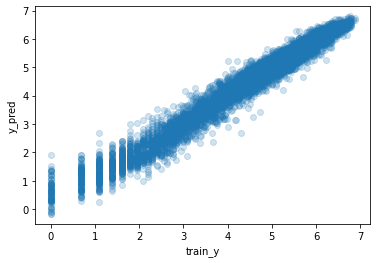

In [68]:
y_pred = reg.predict(train_X)
plt.scatter(train_y, y_pred, alpha = 0.2)
plt.xlabel("train_y")
plt.ylabel("y_pred")
plt.show()

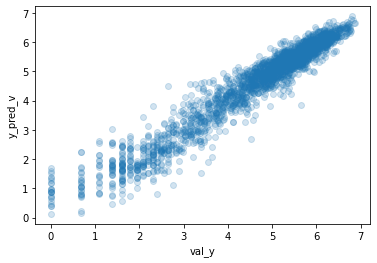

In [69]:
y_pred_v = reg.predict(val_X)
plt.scatter(val_y, y_pred_v, alpha = 0.2)
plt.xlabel("val_y")
plt.ylabel("y_pred_v")
plt.show()

In [70]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[GradientBoostingRegressor()]
model_names=['regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(train_X,train_y)
    val_pred=clf.predict(val_X)
    rmsle.append(np.sqrt(mean_squared_log_error(val_pred,val_y)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
print(d)

{'Modelling Algo': ['regressor'], 'RMSLE': [0.13544146317913608]}


In [71]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = reg, X = train_X, y = train_y, cv = 8)

In [72]:
print(accuracies.mean())
print(accuracies.std())

0.9251872242868302
0.00513644145038339


In [82]:
score_train = reg.score(train_X, train_y)
score_val = reg.score(val_X, val_y)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.967753
validation score: 0.930601


In [83]:
#predict
predictions = reg.predict(test_X)
predictions = np.exp(predictions)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 17.16414402,   2.77207103,   2.10496193,  10.51397754,
        55.50769656, 133.23351566, 294.11046709, 175.0453582 ,
        86.76987048, 105.28666815])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

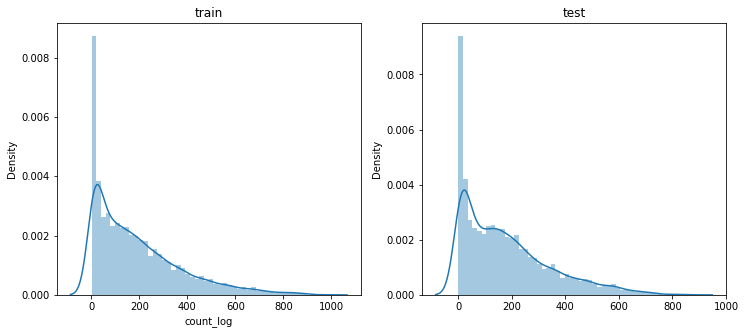

In [80]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.distplot(np.exp(train_y), ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

### RandomForest

In [84]:
def rmsle(y_real, y_pred):
    y_pred = np.array(y_pred)
    y_real = np.array(y_real)
    log_pred = np.log(y_pred +1)
    log_real = np.log(y_real +1)
    diff = log_pred - log_real
    diff = np.square(diff)
    mean_diff = diff.mean()
    score = np.sqrt(mean_diff)
    return score



In [85]:
from sklearn.metrics import make_scorer
rmsle_scorer=make_scorer(rmsle)

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from pandas import DataFrame

kfold=KFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.ensemble import RandomForestRegressor

model =RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

%time score=cross_val_score(model, train_X, train_y,cv=kfold, scoring=rmsle_scorer )
print(score.mean())

CPU times: user 2.65 s, sys: 471 ms, total: 3.12 s
Wall time: 31.6 s
0.12984175181455612


In [97]:
model.fit(train_X,train_y)

RandomForestRegressor(n_jobs=-1, random_state=42)

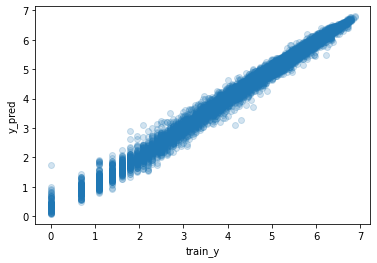

In [88]:
y_pred = model.predict(train_X)
plt.scatter(train_y, y_pred, alpha = 0.2)
plt.xlabel("train_y")
plt.ylabel("y_pred")
plt.show()

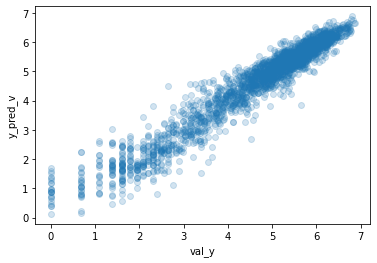

In [89]:
y_pred_v = reg.predict(val_X)
plt.scatter(val_y, y_pred_v, alpha = 0.2)
plt.xlabel("val_y")
plt.ylabel("y_pred_v")
plt.show()

In [90]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[RandomForestRegressor()]
model_names=['regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(train_X,train_y)
    val_pred=clf.predict(val_X)
    rmsle.append(np.sqrt(mean_squared_log_error(val_pred,val_y)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
print(d)

{'Modelling Algo': ['regressor'], 'RMSLE': [0.12866823066083644]}


In [98]:
score_train = model.score(train_X, train_y)
score_val = model.score(val_X, val_y)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.987805
validation score: 0.920298


In [99]:
#predict
predictions = model.predict(test_X)
predictions = np.exp(predictions)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 16.026992  ,   3.17379814,   2.41426686,  15.17251235,
        52.17734583, 145.33802727, 337.81125324, 133.46896177,
       106.97045926, 100.21602941])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

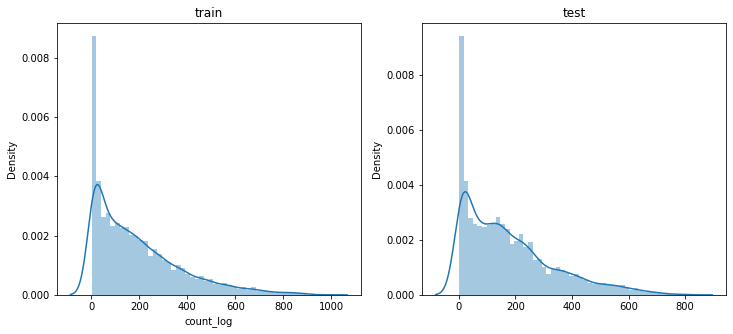

In [100]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.distplot(np.exp(train_y), ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

In [104]:
#Using Cross Validation - 일반화 성능을 측정하기 위해 데이터를 여러번 반복해서 나누고 여러 모델을 학습한다.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [112]:
#Using Random Forest to make model
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []
model = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 0)

In [105]:
%time score = cross_val_score(model, train_X, train_y, cv = k_fold, scoring= rmsle_scorer)
score = score.mean()
print("Score = {0:.5f}".format(score))

CPU times: user 2.31 s, sys: 473 ms, total: 2.78 s
Wall time: 30.8 s
Score = 0.13120


In [114]:
#Train
model.fit(train_X, train_y)

RandomForestRegressor(n_jobs=-1, random_state=0)

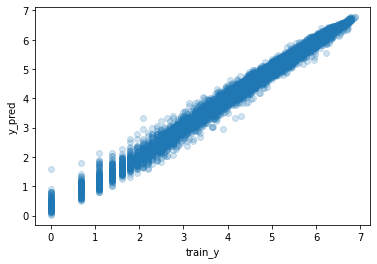

In [108]:
y_pred = model.predict(train_X)
plt.scatter(train_y, y_pred, alpha = 0.2)
plt.xlabel("train_y")
plt.ylabel("y_pred")
plt.show()

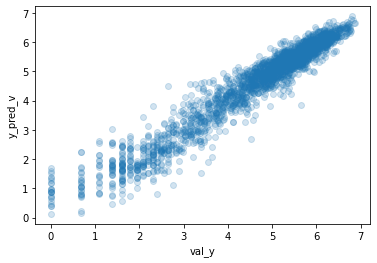

In [109]:
y_pred_v = reg.predict(val_X)
plt.scatter(val_y, y_pred_v, alpha = 0.2)
plt.xlabel("val_y")
plt.ylabel("y_pred_v")
plt.show()

In [110]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[RandomForestRegressor()]
model_names=['regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(train_X,train_y)
    val_pred=clf.predict(val_X)
    rmsle.append(np.sqrt(mean_squared_log_error(val_pred,val_y)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
print(d)

{'Modelling Algo': ['regressor'], 'RMSLE': [0.12880511878800427]}


In [115]:
score_train = model.score(train_X, train_y)
score_val = model.score(val_X, val_y)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.987858
validation score: 0.919537


In [116]:
#predict
predictions = model.predict(test_X)
predictions = np.exp(predictions)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 15.32752417,   3.33311364,   2.66029301,  14.18505878,
        50.32098406, 149.14666371, 329.64390434, 133.29758796,
       107.25556368,  96.77660754])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

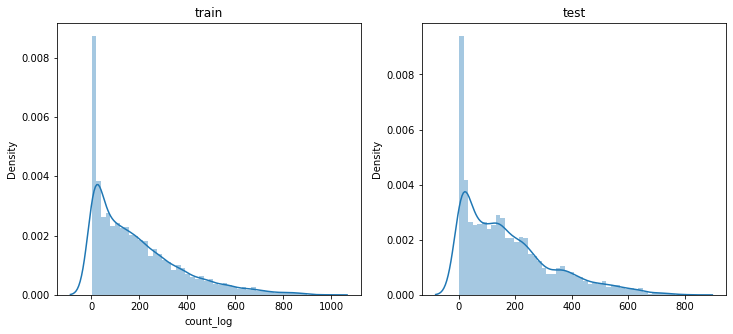

In [117]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.distplot(np.exp(train_y), ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

### 풍속 전처리 X라면?

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05, max_depth = 5, min_samples_leaf = 15, min_samples_split = 10, random_state = 42)

reg.fit(train_X,train_y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

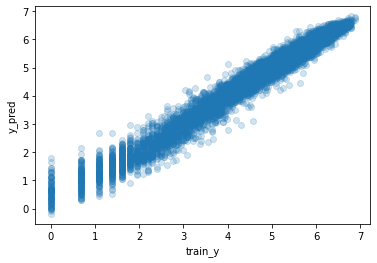

In [135]:
y_pred = reg.predict(train_X)
plt.scatter(train_y, y_pred, alpha = 0.2)
plt.xlabel("train_y")
plt.ylabel("y_pred")
plt.show()

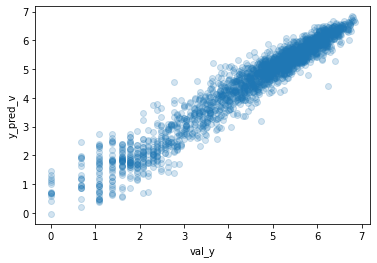

In [136]:
y_pred_v = reg.predict(val_X)
plt.scatter(val_y, y_pred_v, alpha = 0.2)
plt.xlabel("val_y")
plt.ylabel("y_pred_v")
plt.show()

In [137]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[GradientBoostingRegressor()]
model_names=['regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(train_X,train_y)
    val_pred=clf.predict(val_X)
    rmsle.append(np.sqrt(mean_squared_log_error(val_pred,val_y)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
print(d)

{'Modelling Algo': ['regressor'], 'RMSLE': [0.12632860699213896]}


In [138]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = reg, X = train_X, y = train_y, cv = 8)

In [139]:
print(accuracies.mean())
print(accuracies.std())

0.9268526793683647
0.005568366092280983


In [140]:
score_train = reg.score(train_X, train_y)
score_val = reg.score(val_X, val_y)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.968187
validation score: 0.933744


In [141]:
#predict
predictions = reg.predict(test_X)
predictions = np.exp(predictions)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 14.17636733,   5.62830946,   3.65229435,   2.95057169,
         2.0430332 ,  11.84356882,  70.91044071, 129.13117338,
       311.55515937, 179.44135656])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

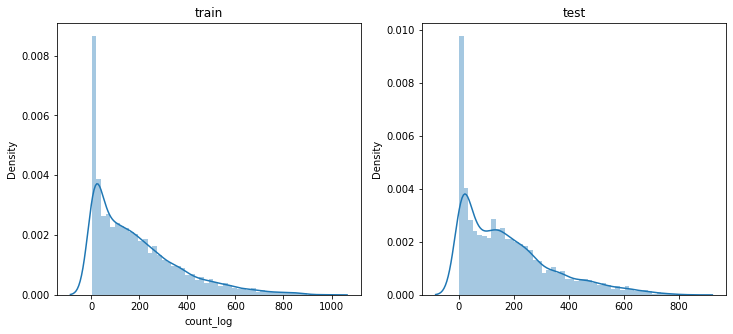

In [142]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.distplot(np.exp(train_y), ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

### RandomForest

In [143]:
def rmsle(y_real, y_pred):
    y_pred = np.array(y_pred)
    y_real = np.array(y_real)
    log_pred = np.log(y_pred +1)
    log_real = np.log(y_real +1)
    diff = log_pred - log_real
    diff = np.square(diff)
    mean_diff = diff.mean()
    score = np.sqrt(mean_diff)
    return score



In [144]:
from sklearn.metrics import make_scorer
rmsle_scorer=make_scorer(rmsle)

In [152]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from pandas import DataFrame

kfold=KFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.ensemble import RandomForestRegressor

model =RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

%time score=cross_val_score(model, train_X, train_y,cv=kfold, scoring=rmsle_scorer )
print(score.mean())

CPU times: user 2.29 s, sys: 398 ms, total: 2.69 s
Wall time: 29.2 s
0.13293903288312614


In [153]:
model.fit(train_X,train_y)

RandomForestRegressor(n_jobs=-1, random_state=42)

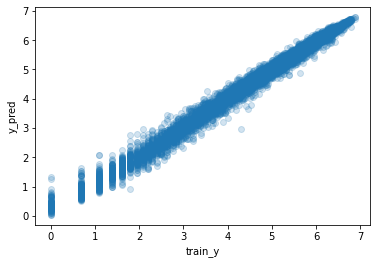

In [147]:
y_pred = model.predict(train_X)
plt.scatter(train_y, y_pred, alpha = 0.2)
plt.xlabel("train_y")
plt.ylabel("y_pred")
plt.show()

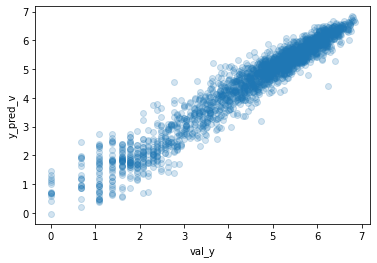

In [148]:
y_pred_v = reg.predict(val_X)
plt.scatter(val_y, y_pred_v, alpha = 0.2)
plt.xlabel("val_y")
plt.ylabel("y_pred_v")
plt.show()

In [149]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[RandomForestRegressor()]
model_names=['regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(train_X,train_y)
    val_pred=clf.predict(val_X)
    rmsle.append(np.sqrt(mean_squared_log_error(val_pred,val_y)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
print(d)

{'Modelling Algo': ['regressor'], 'RMSLE': [0.1229493909872562]}


In [154]:
score_train = model.score(train_X, train_y)
score_val = model.score(val_X, val_y)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.987876
validation score: 0.920411


In [155]:
#predict
predictions = model.predict(test_X)
predictions = np.exp(predictions)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 13.03160475,   2.44127226,   4.1882873 ,   3.61192459,
         2.33200175,  14.78458348,  61.40453076, 143.51511113,
       248.00959207, 184.05154713])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

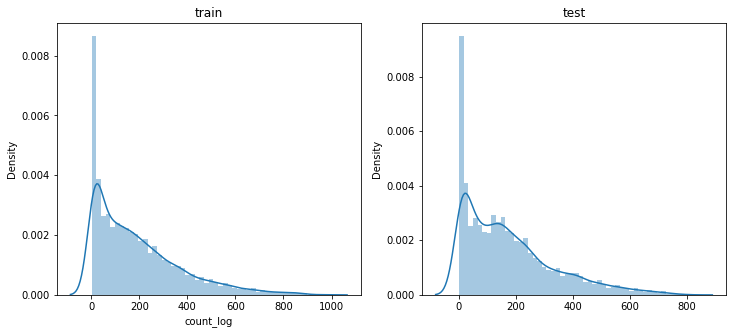

In [156]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.distplot(np.exp(train_y), ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

In [157]:
#Using Cross Validation - 일반화 성능을 측정하기 위해 데이터를 여러번 반복해서 나누고 여러 모델을 학습한다.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [165]:
#Using Random Forest to make model
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []
model = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 0)

In [159]:
%time score = cross_val_score(model, train_X, train_y, cv = k_fold, scoring= rmsle_scorer)
score = score.mean()
print("Score = {0:.5f}".format(score))

CPU times: user 2.28 s, sys: 399 ms, total: 2.68 s
Wall time: 29.2 s
Score = 0.13131


In [166]:
#Train
model.fit(train_X, train_y)

RandomForestRegressor(n_jobs=-1, random_state=0)

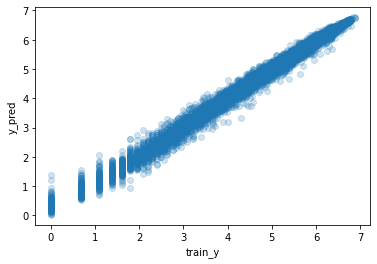

In [161]:
y_pred = model.predict(train_X)
plt.scatter(train_y, y_pred, alpha = 0.2)
plt.xlabel("train_y")
plt.ylabel("y_pred")
plt.show()

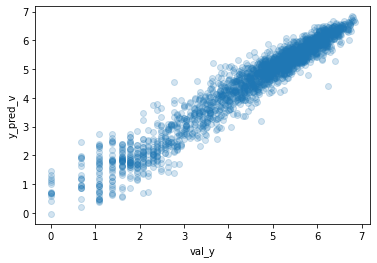

In [162]:
y_pred_v = reg.predict(val_X)
plt.scatter(val_y, y_pred_v, alpha = 0.2)
plt.xlabel("val_y")
plt.ylabel("y_pred_v")
plt.show()

In [170]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[RandomForestRegressor()]
model_names=['regressor']
rmse=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(train_X,train_y)
    val_pred=clf.predict(val_X)
    rmse.append(np.sqrt(mean_squared_error(val_pred,val_y)))
d={'Modelling Algo':model_names,'RMSE':rmse}   
print(d)

{'Modelling Algo': ['regressor'], 'RMSE': [0.42126818576825]}


In [167]:
score_train = model.score(train_X, train_y)
score_val = model.score(val_X, val_y)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.987955
validation score: 0.920100


In [168]:
#predict
predictions = model.predict(test_X)
predictions = np.exp(predictions)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 13.68715025,   2.69051948,   5.19926049,   3.37861274,
         2.5083734 ,  14.66679088,  64.92585544, 130.52814554,
       253.13947032, 174.44395659])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

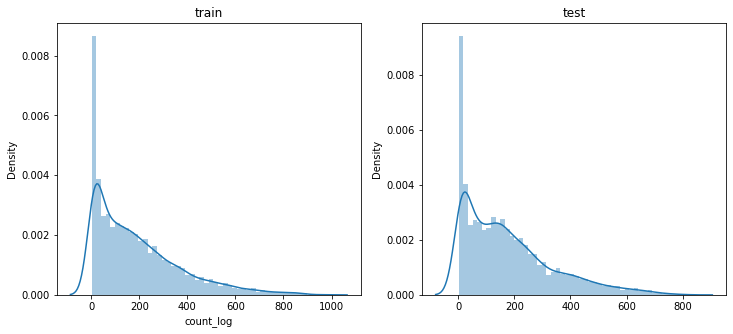

In [169]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.distplot(np.exp(train_y), ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

풍속 0의 값을 바꾸지않는것이 더 높은 정확도를 낸다.

# 회고록

데이터를 제대로 파악하고 모델을 돌려야 제대로 된 결과가 나올거라 생각해 데이터분석과 전처리를 열심히 했지만 생각보다 좋은 결과를 얻지는 못했다.